### SMOTE (Synthetid Minority Oversampling Technique)

Smote is a technique used in ML to address imbalance datasets where the minority class has dignificantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the majority class by interpolating between existing instances

In upsampling we'll create same type of data points in the same place. But here we use interpolating techiques to create synthetic data with variance

In [1]:
from sklearn.datasets import make_classification

In [2]:
X,y=make_classification(n_samples=1000,n_redundant=0,n_features=2,n_clusters_per_class=1,
                    weights=[0.90],random_state=12
                    )

In [3]:
import pandas as pd
df1 = pd.DataFrame(X,columns=['F1','F2'])
df2 = pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)
final_df.head()

,F1,F2,target
0,-0.762898,-0.706808,0
1,-1.075436,-1.051162,0
2,-0.610115,-0.909802,0
3,-2.023284,-0.428945,1
4,-0.812921,-1.316206,0


In [4]:
final_df['target'].value_counts()

target
0    900
1    100
Name: count, dtype: int64

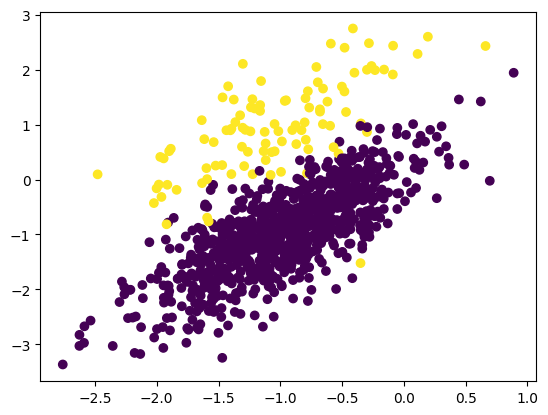

In [5]:
import matplotlib.pyplot as plt
plt.scatter(final_df['F1'],final_df['F2'],c=final_df['target'])

In [6]:
from imblearn.over_sampling import SMOTE

In [14]:
# transform the dataset
oversample = SMOTE()
X,y = oversample.fit_resample(final_df[['F1','F2']],final_df['target'])  # First attribute is independent features and second attribute is dependent feature

In [15]:
X.shape

(1800, 2)

In [16]:
y.shape

(1800,)

In [17]:
print(f"Length of y==0 is {len(y[y==0])} and length of y==1 is {len(y[y==1])}")

Length of y==0 is 900 and length of y==1 is 900


In [19]:
df1 = pd.DataFrame(X,columns=['F1','F2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df1,df2],axis=1)

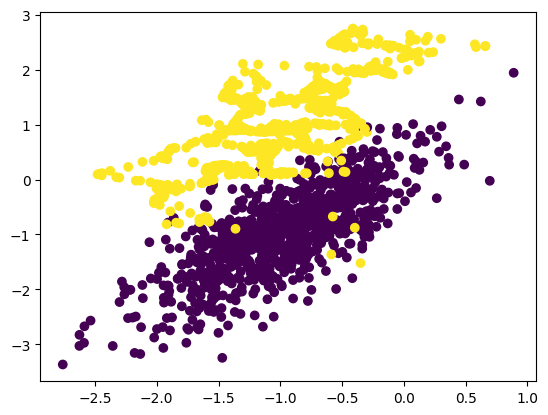

In [20]:
plt.scatter(oversample_df['F1'],oversample_df['F2'],c=oversample_df['target'])